In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [2]:
df_merge_all = pd.read_csv('df_merge_all.csv')

In [3]:
df_merge_all

,id,id_order,product_quantity,sku,unit_price,date,total_price,order_id,created_date,total_paid,state,price,type,category_new,check_new,name
0,1119109,299539,1,OTT0133,18.99,2017-01-01 00:07:19,18.99,299539,2017-01-01 00:07:19,18.99,Shopping Basket,34.99,11865403,Accessories,Brand new,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...
1,1119110,299540,1,LGE0043,399.00,2017-01-01 00:19:45,399.00,299540,2017-01-01 00:19:45,399.00,Shopping Basket,429.00,1296,Monitor,Brand new,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort"
2,1119111,299541,1,PAR0071,474.05,2017-01-01 00:20:57,474.05,299541,2017-01-01 00:20:57,474.05,Shopping Basket,699.00,11905404,Accessories,Brand new,Parrot Bebop 2 White + Command FLYPAD and FPV ...
3,1119112,299542,1,WDT0315,68.39,2017-01-01 00:51:40,68.39,299542,2017-01-01 00:51:40,68.39,Shopping Basket,79.00,12655397,Storage,Brand new,"Blue WD 2TB Hard Drive 35 ""Mac and PC"
4,1119113,299543,1,JBL0104,23.74,2017-01-01 01:06:38,23.74,299543,2017-01-01 01:06:38,23.74,Shopping Basket,29.90,5398,Other,Brand new,Gray Bluetooth Speaker JBL GO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264762,1650198,527397,1,JBL0122,42.99,2018-03-14 13:56:38,42.99,527397,2018-03-14 13:56:38,42.99,Place Order,49.95,5384,Accessories,Brand new,JBL T450 BT Bluetooth Headset Black
264763,1650199,527398,1,JBL0122,42.99,2018-03-14 13:57:25,42.99,527398,2018-03-14 13:57:25,42.99,Shopping Basket,49.95,5384,Accessories,Brand new,JBL T450 BT Bluetooth Headset Black
264764,1650200,527399,1,PAC0653,141.58,2018-03-14 13:57:34,141.58,527399,2018-03-14 13:57:34,141.58,Shopping Basket,215.98,1433,Storage,Brand new,Samsung SSD 850 expansion kit EVO 250GB + Data...
264765,1650201,527400,2,APP0698,9.99,2018-03-14 13:57:41,19.98,527400,2018-03-14 13:57:41,19.98,Shopping Basket,25.00,1230,Accessories,Brand new,Apple Lightning Cable Connector to USB 1m Whit...


C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_760\1271813287.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])


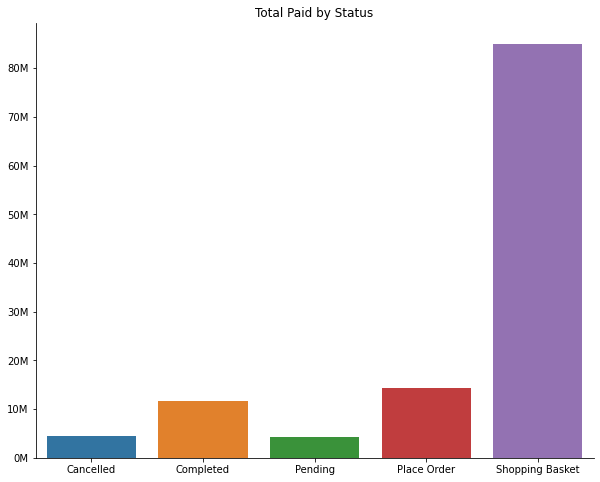

In [7]:
plt.subplots(figsize = (10,8))
ax = sns.barplot(data = df_merge_all.groupby('state').agg({'total_price': 'sum'}).reset_index(), x = 'state', y = 'total_price')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.xlabel('', fontsize = 14)
plt.ylabel('', fontsize = 14)
plt.title('Total Paid by Status')
vals = ax.get_yticks()
ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])
#ax.set_yticklabels([str(int(val/1000000)) + 'M' for val in vals])
sns.despine() # remove the top and right margin, to make your plot prettier 

In [8]:
df_merge_all.groupby('state').agg({'total_price': 'sum'}).reset_index()

,state,total_price
0,Cancelled,4474922.88
1,Completed,11702834.54
2,Pending,4280740.16
3,Place Order,14308464.87
4,Shopping Basket,85019728.73


In [10]:
df_complete = df_merge_all[df_merge_all.state == 'Completed']

In [25]:
df_complete.groupby('id_order')['total_price'].sum().sum() 

11702834.54

In [28]:
(df_complete[['id_order', 'total_paid']]).drop_duplicates()['total_paid'].sum()

11812351.249999998

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_760\2869817790.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(tick/1000000)) + 'M' for tick in ticks]);


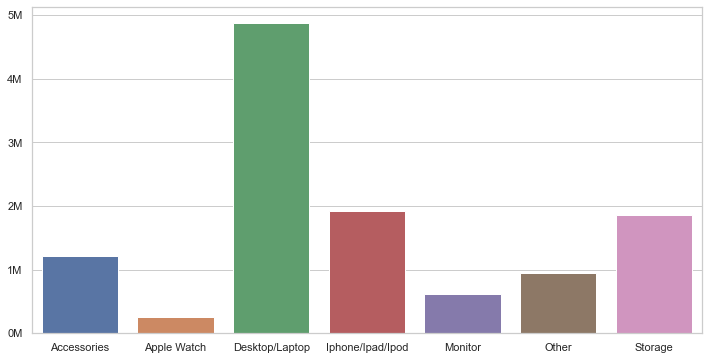

In [83]:
sns.set(font_scale=1)
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
plt.ticklabel_format(style='plain', axis='y')
ax = sns.barplot(data= df_complete.groupby('category_new').agg({'total_price': 'sum'}).reset_index(), x = 'category_new', y = 'total_price')
ax.set(xlabel=None)
ax.set(ylabel=None)
ticks = ax.get_yticks()
ax.set_yticklabels([str(int(tick/1000000)) + 'M' for tick in ticks]);

In [31]:
df_complete.groupby('category_new').agg({'total_price': 'sum'})

,total_price
category_new,
Accessories,1209950.39
Apple Watch,262248.43
Desktop/Laptop,4885285.02
Iphone/Ipad/Ipod,1927490.58
Monitor,620484.94
Other,940651.84
Storage,1856723.34


In [59]:
df_complete.groupby('category_new').agg({'unit_price': 'mean'}).reset_index()

,category_new,unit_price
0,Accessories,49.736054
1,Apple Watch,199.676540
2,Desktop/Laptop,1994.098212
3,Iphone/Ipad/Ipod,643.569965
4,Monitor,424.120721
5,Other,146.037150
6,Storage,210.270760


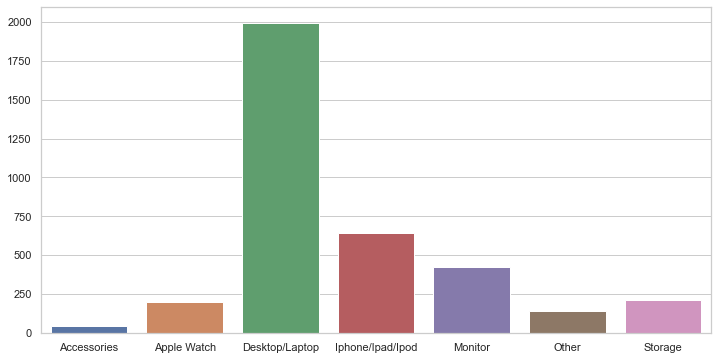

In [68]:
sns.set(font_scale=1)
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
ax = sns.barplot(data= df_complete.groupby('category_new').agg(mean_price = ('unit_price', 'mean')).reset_index(), x = 'category_new', y = 'mean_price')
ax.set(xlabel=None)
ax.set(ylabel=None);

In [57]:
df_complete.groupby('category_new').agg({'unit_price': 'mean'}).reset_index()

,category_new,unit_price
0,Accessories,49.736054
1,Apple Watch,199.676540
2,Desktop/Laptop,1994.098212
3,Iphone/Ipad/Ipod,643.569965
4,Monitor,424.120721
5,Other,146.037150
6,Storage,210.270760


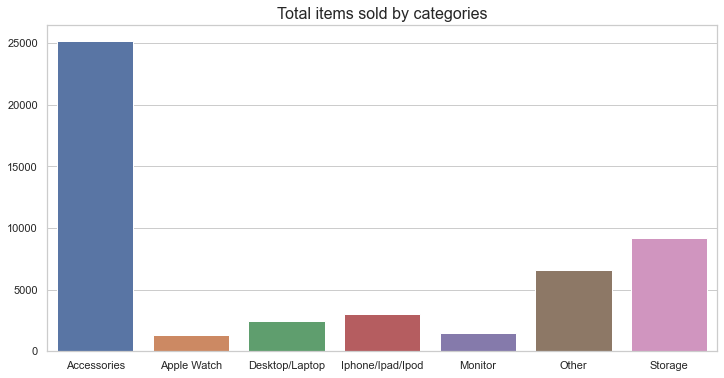

In [79]:
sns.set(font_scale=1)
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
#sns.set_theme(style='white')
ax = sns.barplot(data = df_complete.groupby('category_new').agg(total_items = ('product_quantity', 'sum')).reset_index(), x = 'category_new', y = 'total_items')
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.title('Total items sold by categories', fontsize = 16);

In [88]:
df_complete.loc[:,'discount_abs'] = df_complete['price'] - df_complete['unit_price']
df_complete.loc[:,'discount_per'] = (df_complete['price'] - df_complete['unit_price'])/df_complete['price']*100

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_760\1981638646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete.loc[:,'discount_abs'] = df_complete['price'] - df_complete['unit_price']
C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_760\1981638646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete.loc[:,'discount_per'] = (df_complete['price'] - df_complete['unit_price'])/df_complete['price']*100


In [91]:
df_complete['discount_true'] = np.where(df_complete.discount_per>2, 'Discount', 'No Discount')

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_760\3447275503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['discount_true'] = np.where(df_complete.discount_per>2, 'Discount', 'No Discount')


D:\Anacoda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='discount_true', ylabel='count'>

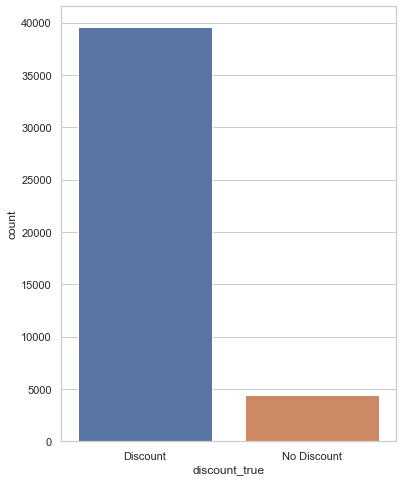

In [100]:
plt.figure(figsize=(6,8))
sns.countplot(df_complete.discount_true)

<AxesSubplot:xlabel='discount_true', ylabel='sku'>

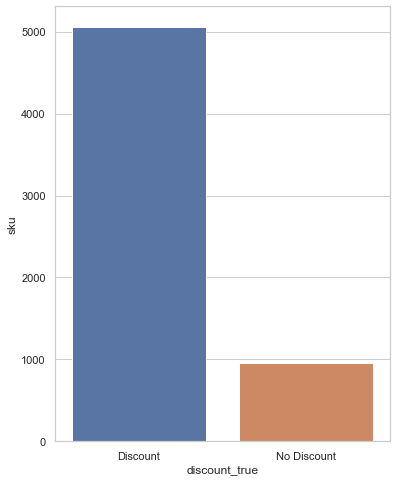

In [101]:
plt.figure(figsize=(6,8))
sns.barplot(data = df_complete.groupby('discount_true').agg({'sku':'nunique'}).reset_index(), x = 'discount_true', y = 'sku')

In [98]:
df_complete.sku.nunique()

5342

In [108]:
df_complete['created_date'] = pd.to_datetime(df_complete['created_date'] )
df_complete = df_complete.assign(month_year = df_complete['created_date'].dt.to_period(freq = 'M'),
                  week = df_complete['created_date'].dt.week,
                  year = df_complete['created_date'].dt.year,
                  day = df_complete['created_date'].dt.date)

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_760\3884367014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_complete['created_date'] = pd.to_datetime(df_complete['created_date'] )
C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_760\3884367014.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  week = df_complete['created_date'].dt.week,


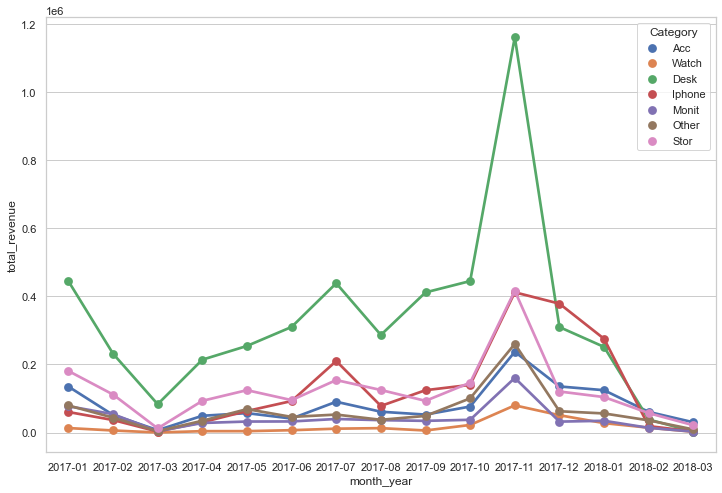

In [134]:
plt.figure(figsize=(12,8))
ax = sns.pointplot(data = df_complete.groupby(['month_year', 'category_new']).agg(total_revenue = ('total_price','sum')).reset_index(), x = 'month_year', y = 'total_revenue', hue = 'category_new', kind='point')
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles, ['Acc', 'Watch', 'Desk', 'Iphone', 'Monit', 'Other', 'Stor'], title = 'Category')